In [1]:
%matplotlib inline

# Import 5 bus test system

In [2]:
import os
import pandas as pd

from psst.case import PSSTCase
from psst.model import build_model
case = PSSTCase(os.path.join('../cases/case5.m'))
case.load = pd.read_csv('../cases/case5.csv', index_col=0)

In [3]:
from psst.case.utils import calculate_segments, generate_segments, sort_segments, incremental_cost

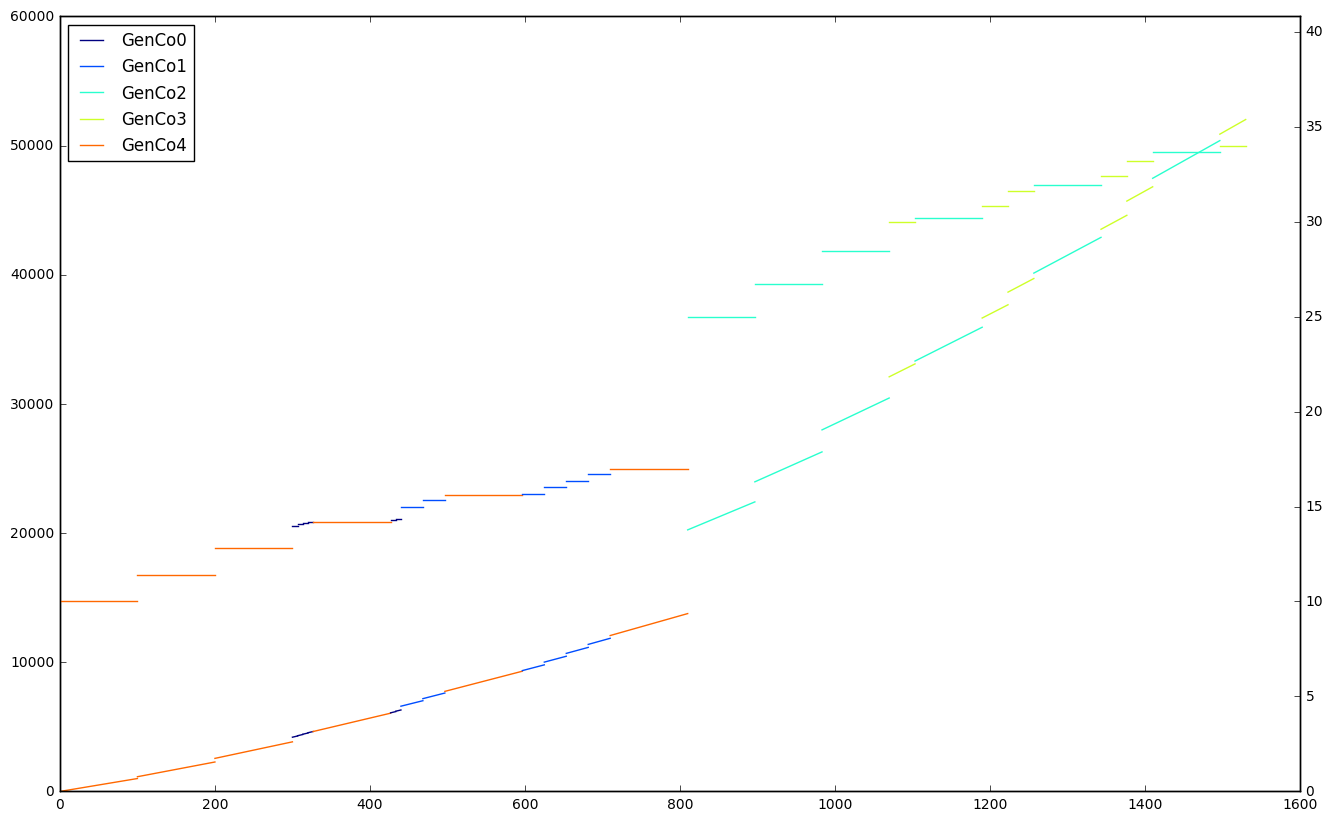

In [4]:
from psst.plot.plot import plot_costs
plot_costs(case, number_of_segments=40)

# Build 

In [5]:
model = build_model(case, config={'segments': 40})

# Solve 

In [6]:
model.solve(solver='cbc')

# Results

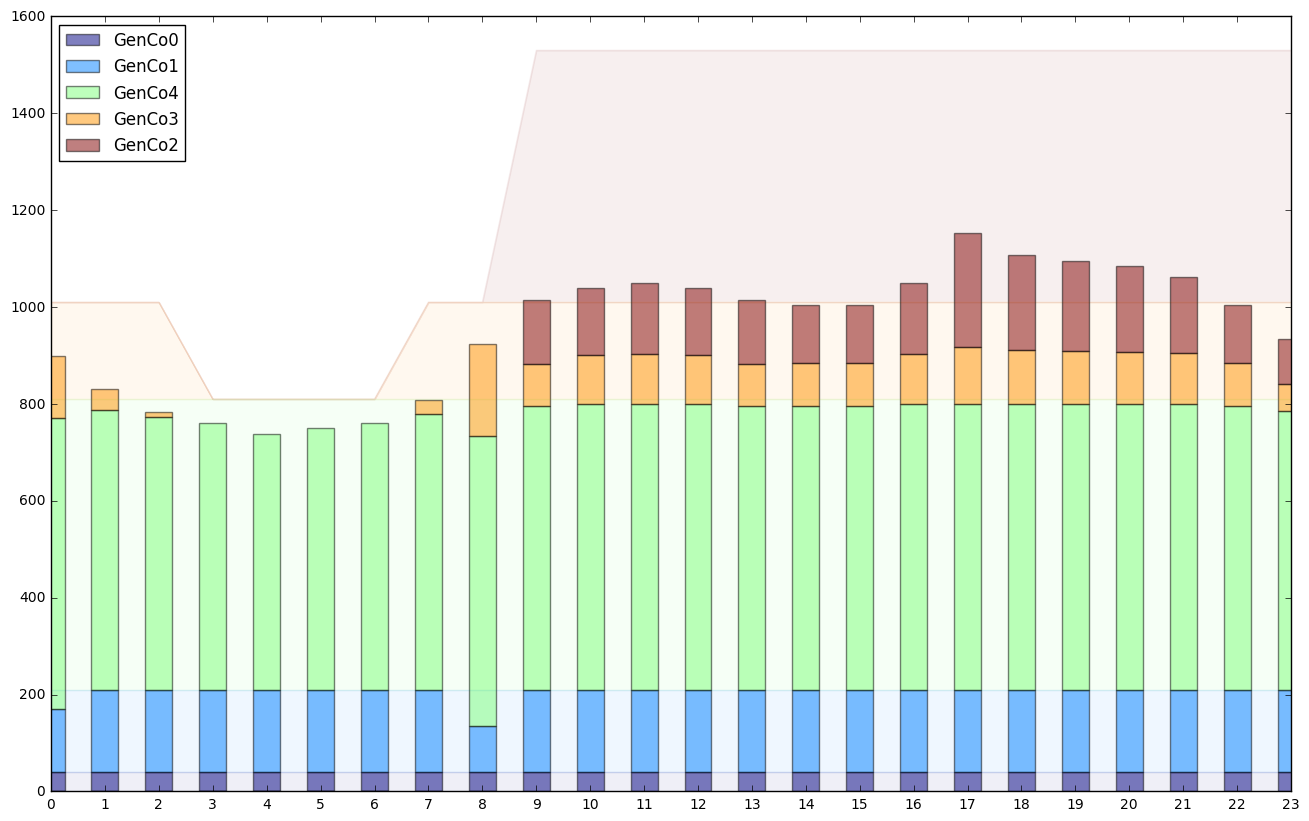

In [7]:
from psst.plot import stacked_power_generation
stacked_power_generation(model.results)

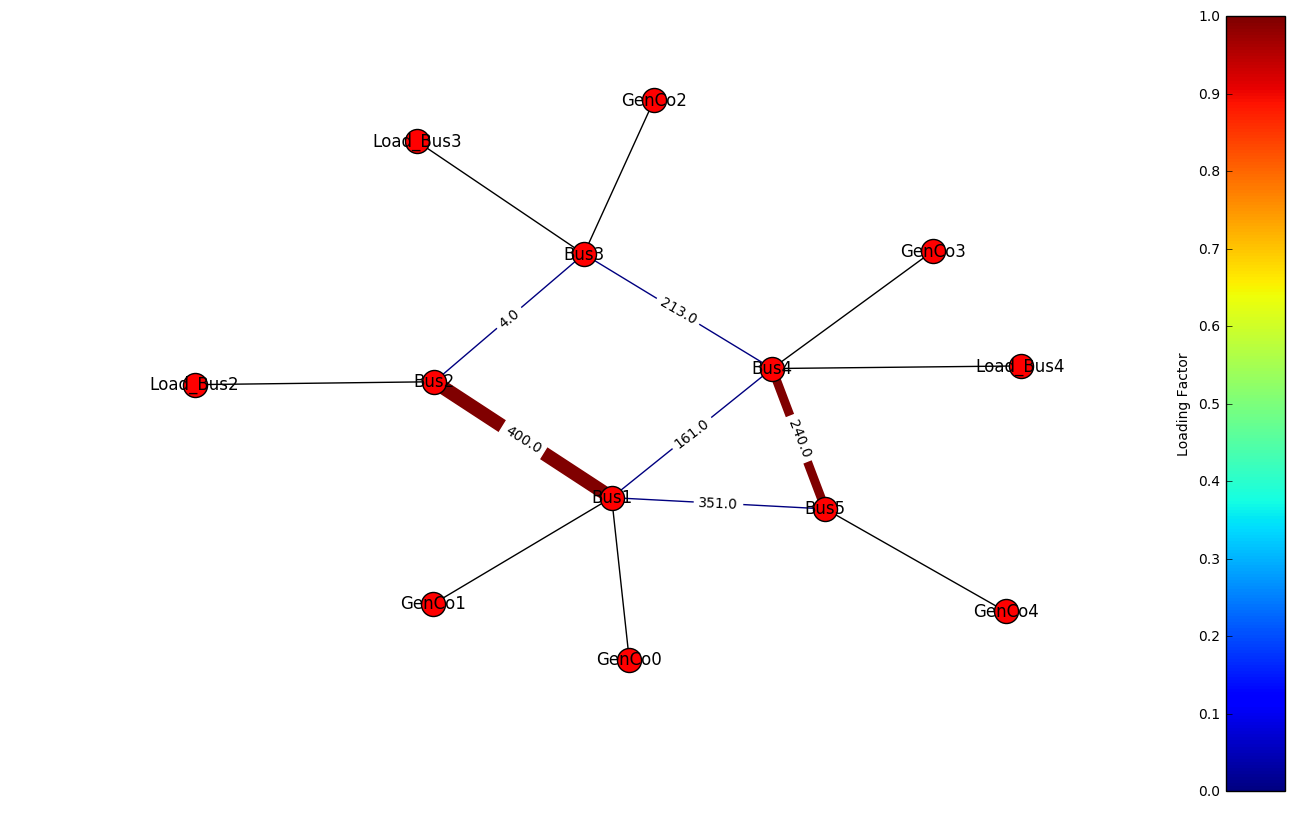

In [8]:
from psst.plot import line_power
from psst.network import create_network
network = create_network(case)
network.recalculate_positions('neato')
line_power(network, model.results, hour=10)

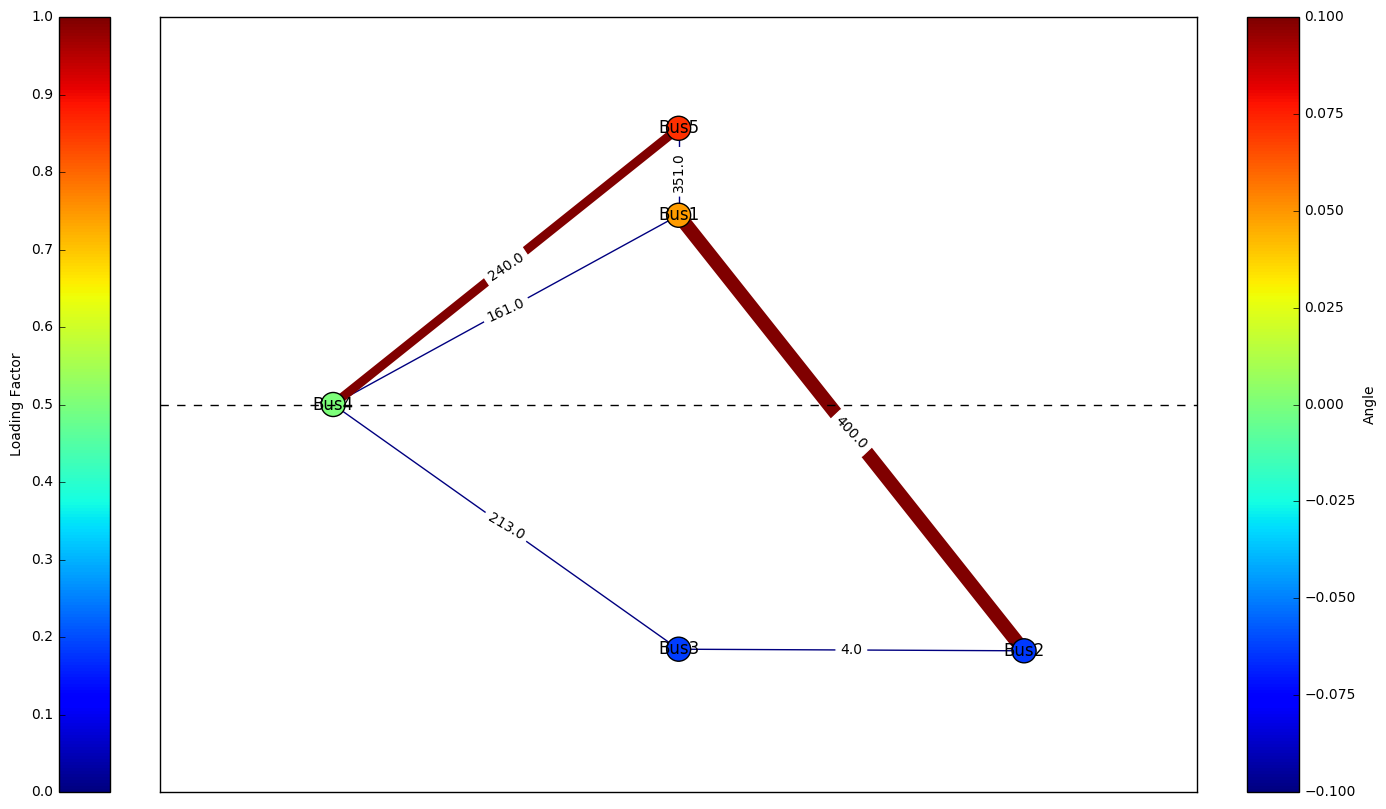

In [9]:
import matplotlib.pyplot as plt
from psst.plot.network import plot_angles

ax = plot_angles(network, model.results, hour=10)
